In [1]:
#use this code to download dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hiimanshuagarwal/predictive-maintenance-dataset")

print("Path to dataset files:", path)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "C:/Users/Harsh/model training/predictive_maintenance_dataset.csv"
df = pd.read_csv(file_path)

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB
None
             failure       metric1        metric2        metric3  \
count  124494.000000  1.244940e+05  124494.000000  124494.000000   
mean        0.000851  1.223881e+08     159.492706       9.940897   
std         0.029167  7.045933e+07    2179.677781     185.748131   
min         0.000000  0.0000

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 124493 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124493 non-null  object
 1   device   124493 non-null  object
 2   failure  124493 non-null  int64 
 3   metric1  124493 non-null  int64 
 4   metric2  124493 non-null  int64 
 5   metric3  124493 non-null  int64 
 6   metric4  124493 non-null  int64 
 7   metric5  124493 non-null  int64 
 8   metric6  124493 non-null  int64 
 9   metric7  124493 non-null  int64 
 10  metric8  124493 non-null  int64 
 11  metric9  124493 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 12.3+ MB
None
             failure       metric1        metric2        metric3  \
count  124493.000000  1.244930e+05  124493.000000  124493.000000   
mean        0.000851  1.223875e+08     159.493988       9.940977   
std         0.029167  7.045934e+07    2179.686488     185.748875   
min         0.000000  0.000000e+0

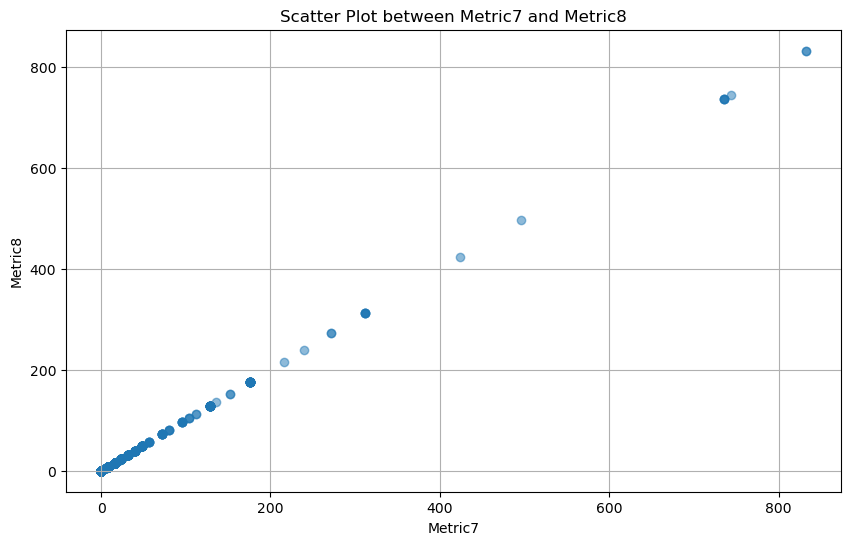

In [6]:
# As we can see in metric7 and metric8 data looks similar so we will check using putting data in the graph
plt.figure(figsize=(10, 6))
plt.scatter(df['metric7'], df['metric8'], alpha=0.5)
plt.title('Scatter Plot between Metric7 and Metric8')
plt.xlabel('Metric7')
plt.ylabel('Metric8')
plt.grid(True)
plt.show()


In [7]:
for num in ["2","3","4","7","8","9"]:
    df[f'metric{num}'] = np.log1p(df[f'metric{num}'])

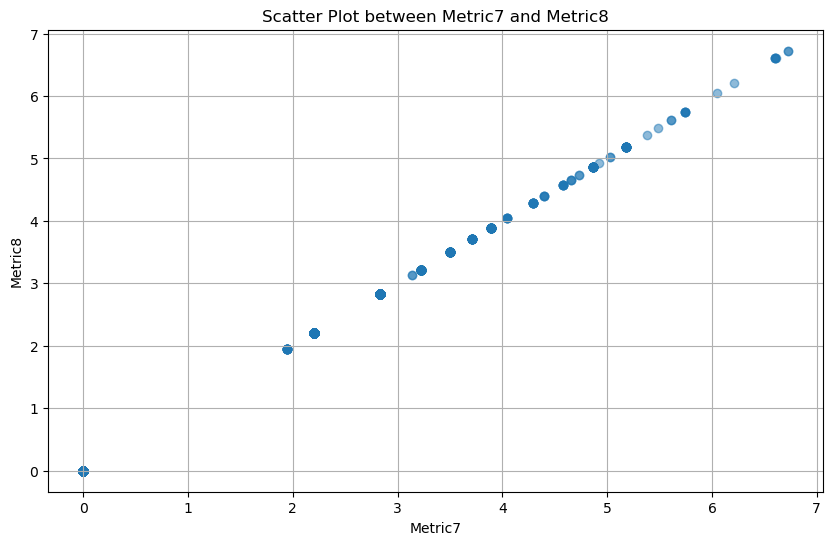

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['metric7'], df['metric8'], alpha=0.5)
plt.title('Scatter Plot between Metric7 and Metric8')
plt.xlabel('Metric7')
plt.ylabel('Metric8')
plt.grid(True)
plt.show()

In [9]:
#after obseving both graph we can say it is safe to remove any one of them so , we remove metric8
df.drop("metric8",axis=1,inplace=True)

In [10]:
def summarize_data(df):
    print("Number of rows and columns:", df.shape)
    print("\nColumns in the dataset:", df.columns)
    print("\nData types and missing values:")
    print(df.info())
    print("\nSummary statistics for numerical columns:")
    print(df.describe())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nUnique values in 'failure' column:")
    print(df['failure'].value_counts())

summarize_data(df)

Number of rows and columns: (124493, 11)

Columns in the dataset: Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric9'],
      dtype='object')

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 124493 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     124493 non-null  object 
 1   device   124493 non-null  object 
 2   failure  124493 non-null  int64  
 3   metric1  124493 non-null  int64  
 4   metric2  124493 non-null  float64
 5   metric3  124493 non-null  float64
 6   metric4  124493 non-null  float64
 7   metric5  124493 non-null  int64  
 8   metric6  124493 non-null  int64  
 9   metric7  124493 non-null  float64
 10  metric9  124493 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 11.4+ MB
None

Summary statistics for numerical columns:
             failure    

In [11]:
df["device"]

0         S1F01085
1         S1F0166B
2         S1F01E6Y
3         S1F01JE0
4         S1F01R2B
            ...   
124489    Z1F0MA1S
124490    Z1F0Q8RT
124491    Z1F0QK05
124492    Z1F0QL3N
124493    Z1F0QLC1
Name: device, Length: 124493, dtype: object

In [12]:
#it seems like first four latters are repeating so we will make saprate column with it
df["device_model"]=df["device"].apply(lambda x : x[:4])
df["device_model"].value_counts() 

device_model
S1F0    33168
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

In [13]:
#there some data which is not included so we will make another for rest of data
df["device_rest"]=df["device"].apply(lambda x : x[4:])
df["device_rest"].value_counts()[:20]    #here we willlook at take first 20 data 

device_rest
QLC1    304
KYCR    304
E9EP    304
EGMT    304
FGBQ    304
FP0C    304
GCED    304
GGPP    304
5X69    304
GPXY    304
H6JG    304
FEH7    304
MA1S    304
FY92    304
FZPA    304
G9T7    304
JH87    304
JXDL    304
JY02    304
GB8A    304
Name: count, dtype: int64

In [14]:
#no need to keep column devices
df.drop("device",axis=1,inplace=True)

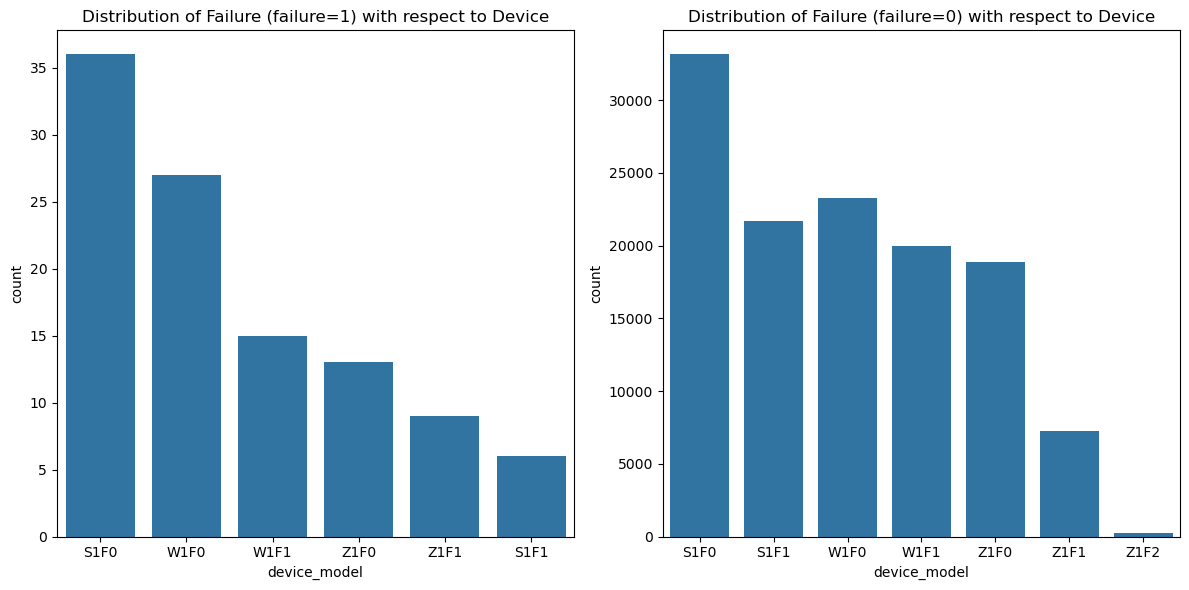

In [15]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))
# Plot the distribution of 'failure' with respect to 'device' for failure=1
plt.subplot(1, 2, 1)
sns.countplot(x="device_model", data=df.loc[df["failure"] == 1])
plt.title('Distribution of Failure (failure=1) with respect to Device')

# Plot the distribution of 'failure' with respect to 'device' for failure=0
plt.subplot(1, 2, 2)
sns.countplot(x="device_model", data=df.loc[df["failure"] == 0])
plt.title('Distribution of Failure (failure=0) with respect to Device')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [16]:
#since there is no Z1F2 in result we can drop it
df.drop(df.loc[df["device_model"]=="Z1F2"].index,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df.tail()

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,device_model,device_rest
124237,11/2/2015,0,18310224,0.000000,0.000000,0.000000,10,353705,2.197225,0.000000,Z1F0,MA1S
124238,11/2/2015,0,172556680,4.574711,4.682131,1.609438,11,332792,0.000000,2.639057,Z1F0,Q8RT
124239,11/2/2015,0,19029120,8.483223,0.000000,0.000000,11,350410,0.000000,0.000000,Z1F0,QK05
124240,11/2/2015,0,226953408,0.000000,0.000000,0.000000,12,358980,0.000000,0.000000,Z1F0,QL3N
124241,11/2/2015,0,17572840,0.000000,0.000000,0.000000,10,351431,0.000000,11.156265,Z1F0,QLC1


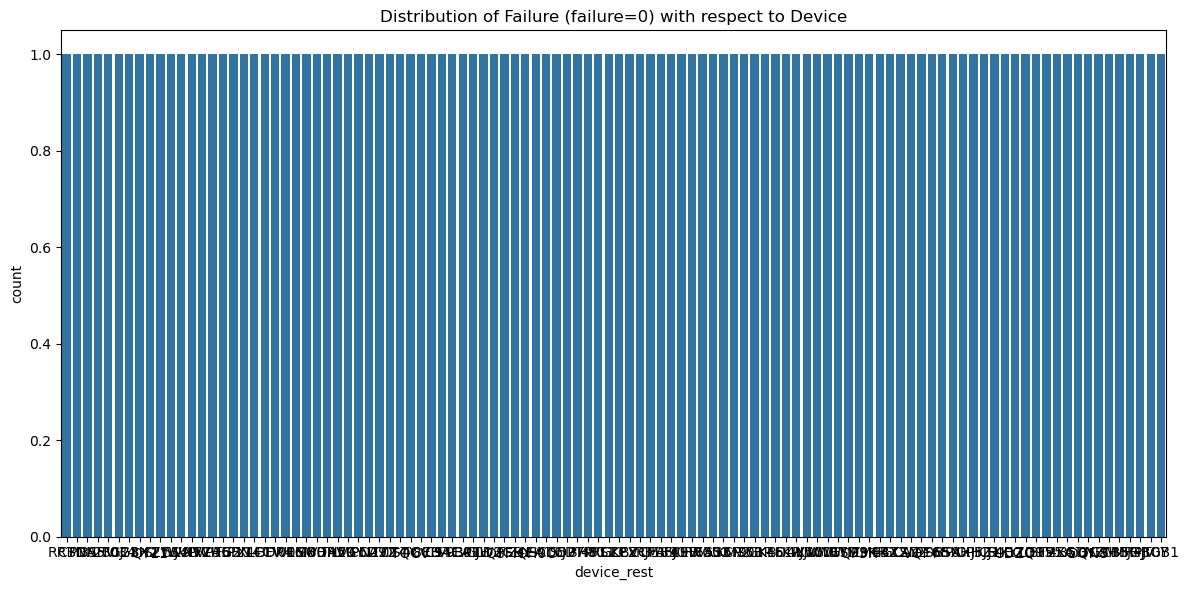

In [17]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(12, 6))
sns.countplot(x="device_rest", data=df.loc[df["failure"] == 1])
plt.title('Distribution of Failure (failure=0) with respect to Device')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [18]:

df.drop("device_rest",axis=1,inplace=True)
df.sample(5)

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,device_model
71844,4/19/2015,0,138994304,0.0,0.0,0.0,9,252940,0.0,2.302585,S1F0
60270,3/24/2015,0,100171432,0.0,0.0,0.0,13,44,0.0,0.000000,W1F1
44999,3/1/2015,0,124080784,0.0,0.0,0.0,10,35,0.0,0.000000,Z1F0
55382,3/17/2015,0,231110096,0.0,0.0,0.0,9,216604,0.0,0.000000,S1F1
105100,7/21/2015,0,133519064,0.0,0.0,0.0,8,230766,0.0,0.000000,Z1F1


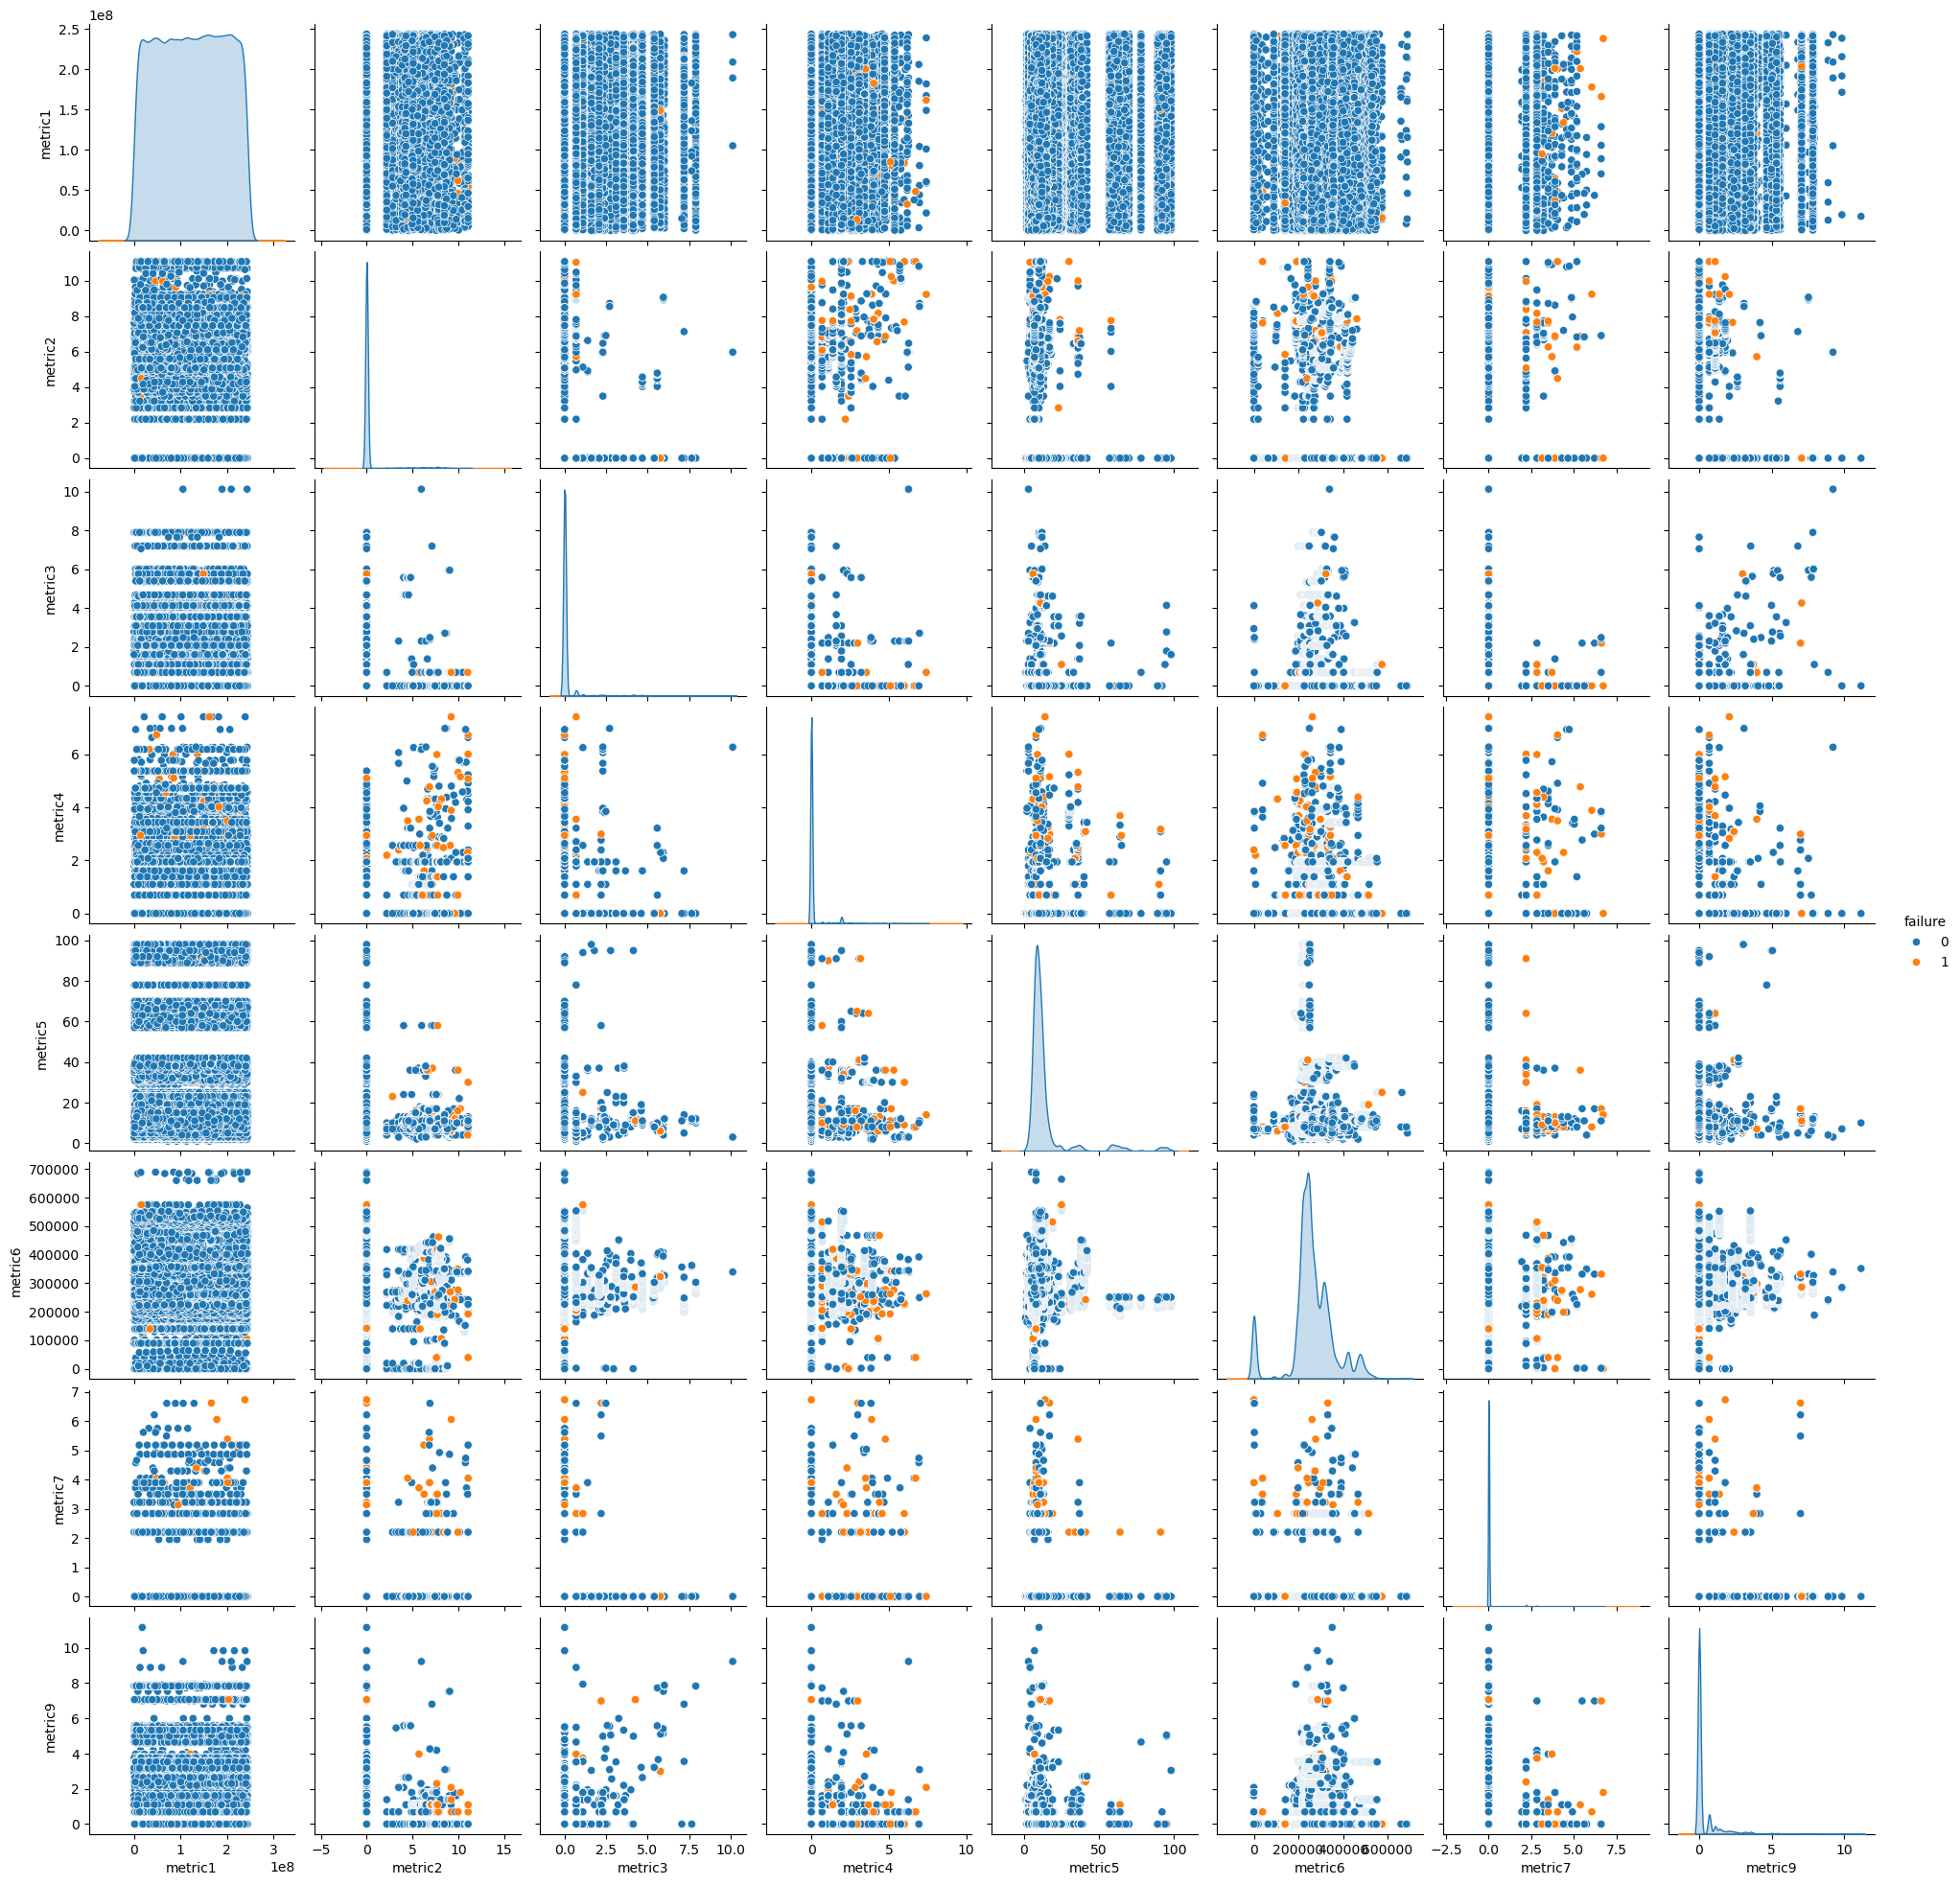

In [19]:
sns.pairplot(df, hue='failure', vars=['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric9'])

Distribution for failure is 0


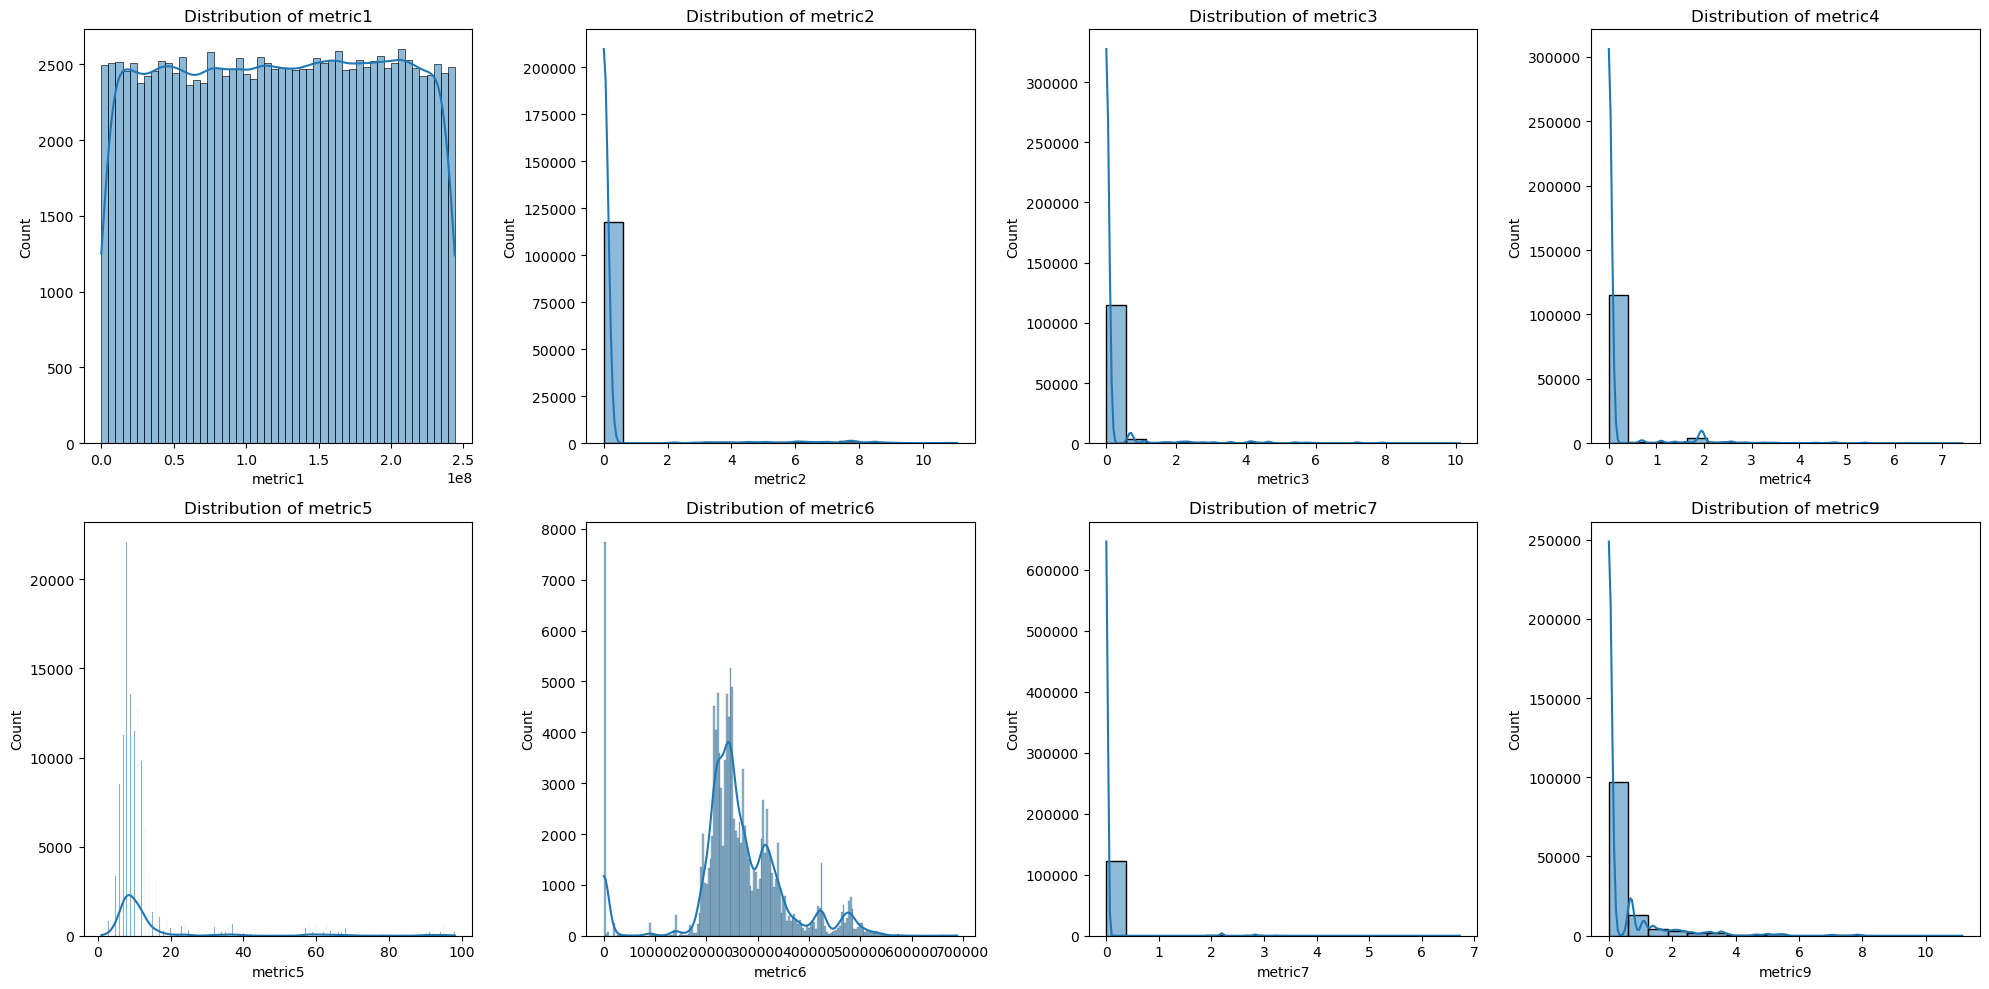

In [20]:
# Create histograms to visualize the distribution of selected metrics with 'failure' as hue
plt.figure(figsize=(4*5, 2*5))
print("Distribution for failure is 0")
mask= df.failure==0
for i, col in enumerate(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7',  'metric9']):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=df.loc[mask], x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

Text(0.5, 1.0, 'Failure over Time by Month')

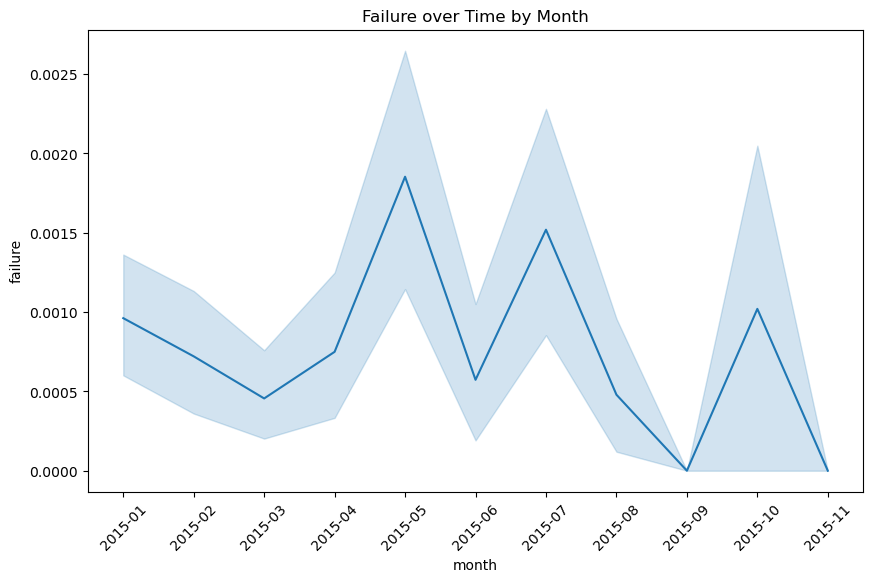

In [21]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract and format the 'month' column for plotting
df['month'] = df['date'].dt.to_period('M')
df['month'] = df['month'].dt.strftime('%Y-%m')

# Create a line plot to visualize 'failure' over time by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Month")

Text(0.5, 1.0, 'Failure over Time by Week')

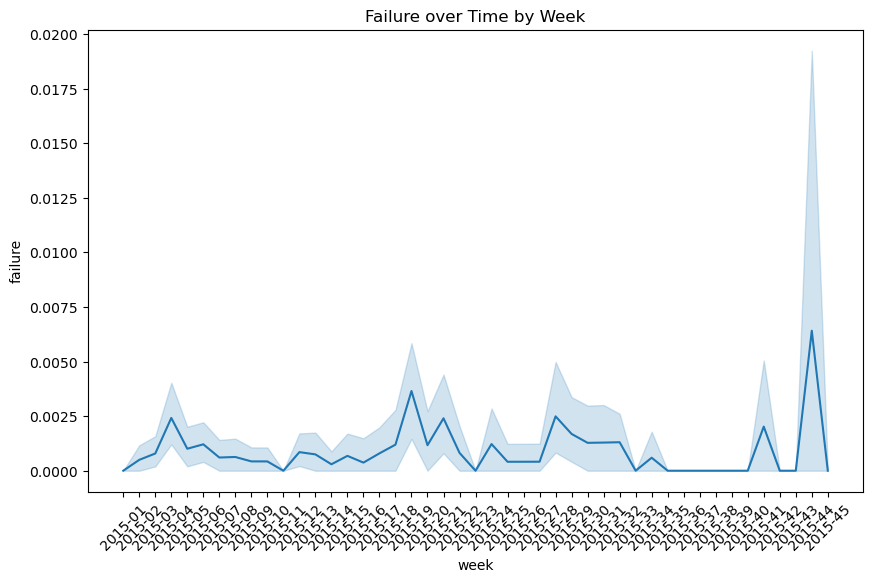

In [22]:
# Extract and format the 'week' column for plotting
df['week'] = df['date'].dt.to_period('W')
df['week'] = df['week'].dt.strftime('%Y-%U')

# Create a line plot to visualize 'failure' over time by week
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='week', y='failure')
plt.xticks(rotation=45)
plt.title("Failure over Time by Week")

Text(0.5, 1.0, 'Correlation Matrix')

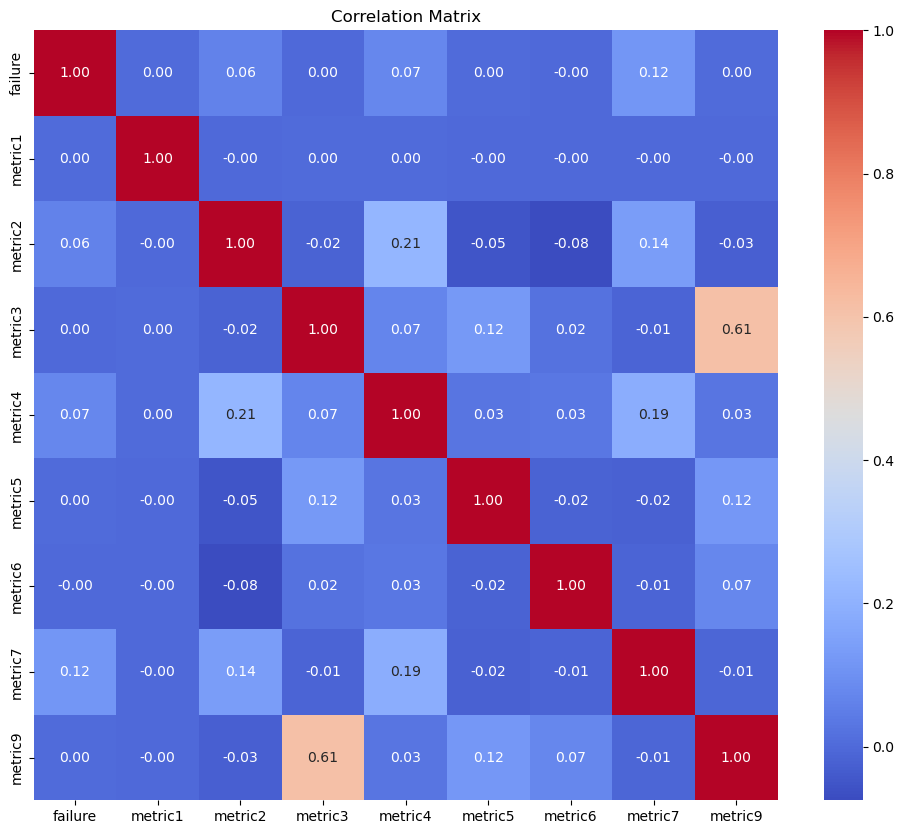

In [23]:
# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")

Text(0.5, 1.0, "Distribution of 'failure'")

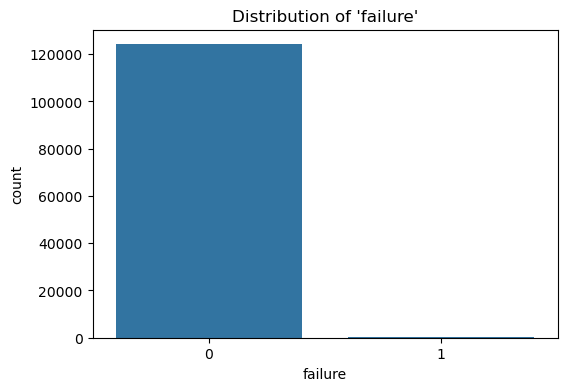

In [24]:
#Since failure is generally zero looking to correlation would not be efficient.
# Create a countplot to visualize the distribution of 'failure'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='failure')
plt.title("Distribution of 'failure'")

In [25]:
#So the problem is undersampling problem!
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14080\957447016.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', palette='Set3')
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14080\957447016.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_month', palette='Set3')
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14080\957447016.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_weekend', palette='Set3')


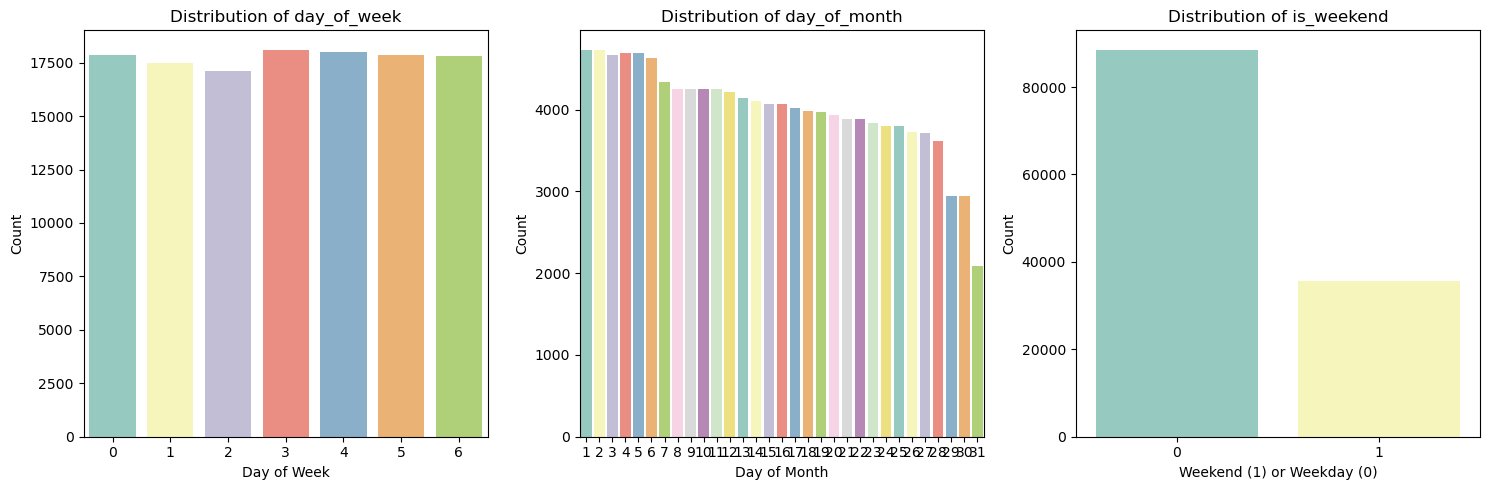

In [26]:
# Create subplots to visualize the distribution of day_of_week, day_of_month, and is_weekend
plt.figure(figsize=(15, 5))

# Distribution of 'day_of_week'
plt.subplot(131)
sns.countplot(data=df, x='day_of_week', palette='Set3')
plt.title("Distribution of day_of_week")
plt.xlabel("Day of Week")
plt.ylabel("Count")

# Distribution of 'day_of_month'
plt.subplot(132)
sns.countplot(data=df, x='day_of_month', palette='Set3')
plt.title("Distribution of day_of_month")
plt.xlabel("Day of Month")
plt.ylabel("Count")

# Distribution of 'is_weekend'
plt.subplot(133)
sns.countplot(data=df, x='is_weekend', palette='Set3')
plt.title("Distribution of is_weekend")
plt.xlabel("Weekend (1) or Weekday (0)")
plt.ylabel("Count")

# Show the subplots
plt.tight_layout()
plt.show()

In [27]:
# Extract the month number and week number from the 'date' column and drop the 'date' column
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df = df.drop(['date'], axis=1)

# Check the DataFrame information after these transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124242 entries, 0 to 124241
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   failure       124242 non-null  int64  
 1   metric1       124242 non-null  int64  
 2   metric2       124242 non-null  float64
 3   metric3       124242 non-null  float64
 4   metric4       124242 non-null  float64
 5   metric5       124242 non-null  int64  
 6   metric6       124242 non-null  int64  
 7   metric7       124242 non-null  float64
 8   metric9       124242 non-null  float64
 9   device_model  124242 non-null  object 
 10  month         124242 non-null  int32  
 11  week          124242 non-null  UInt32 
 12  day_of_week   124242 non-null  int32  
 13  day_of_month  124242 non-null  int32  
 14  is_weekend    124242 non-null  int64  
dtypes: UInt32(1), float64(5), int32(3), int64(5), object(1)
memory usage: 12.4+ MB


In [28]:
df=pd.get_dummies(df,drop_first=True)

In [29]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
# Create a copy of the DataFrame 'df'
X = df.copy()

# Create the target variable 'Y' by selecting the 'failure' column
Y = df["failure"]

# Remove the 'failure' column from the feature matrix 'X'
X.drop("failure", axis=1, inplace=True)

In [32]:
# Create an instance of the RandomUnderSampler with a fixed random state
rus = RandomUnderSampler(random_state=42)

# Perform random under-sampling and obtain resampled feature matrix and target variable
X_resampled, y_resampled = rus.fit_resample(X, Y)


In [33]:
# Create a new DataFrame 'under_sample' by copying the resampled features and adding the 'failure' column back
under_sample = X_resampled.copy()
under_sample["failure"] = y_resampled

In [34]:
# Display a random sample of 10 rows from the under-sampled dataset
under_sample.sample(10)

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,month,week,day_of_week,day_of_month,is_weekend,device_model_S1F1,device_model_W1F0,device_model_W1F1,device_model_Z1F0,device_model_Z1F1,failure
71231,197102344,0.000000,0.0,0.000000,14,339603,0.000000,0.000000,4,16,4,17,0,True,False,False,False,False,0
67974,45425512,0.000000,0.0,0.000000,14,338428,0.000000,0.000000,4,15,3,9,0,True,False,False,False,False,0
23235,107483736,0.000000,0.0,0.000000,4,311012,0.000000,1.609438,1,5,3,29,0,False,True,False,False,False,0
121297,239041368,0.000000,0.0,0.000000,5,249044,0.000000,0.000000,10,40,3,1,0,True,False,False,False,False,0
34185,97170872,7.854381,0.0,4.110874,12,462175,0.000000,0.000000,2,7,5,14,1,False,False,False,False,False,1
44841,229601512,4.574711,0.0,0.000000,9,27,0.000000,0.000000,3,9,6,1,1,False,False,True,False,False,0
22438,229400712,0.000000,0.0,3.688879,64,200990,2.197225,1.098612,1,5,2,28,0,False,True,False,False,False,1
62604,205833176,0.000000,0.0,1.945910,57,238277,0.000000,0.693147,3,13,5,28,1,False,False,False,True,False,0
76217,183295960,0.000000,0.0,0.000000,11,216230,0.000000,0.000000,5,18,4,1,0,False,False,False,False,False,0
109143,150125272,0.000000,0.0,3.178054,91,251780,2.197225,0.000000,8,32,0,3,0,False,False,False,False,False,1


Text(0.5, 1.0, "Distribution of 'failure'")

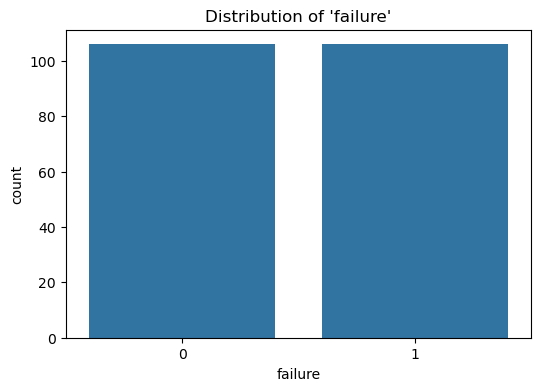

In [35]:
# Create a countplot to visualize the distribution of 'failure' in the under-sampled dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=under_sample, x='failure')
plt.title("Distribution of 'failure'")

In [36]:
# Import the necessary libraries for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create feature matrix 'X_norm' and target variable 'y_norm'
X_norm = under_sample.drop(['failure'], axis=1)
y_norm = under_sample['failure']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
# Import various classification algorithms and evaluation metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
def evaluate_model(x_train, y_train, x_test, y_test):
    # Define a list of classifiers
    classifiers = [
        GradientBoostingClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        GaussianNB(),
        BernoulliNB(),
        SVC(),
        LogisticRegression(),
        SGDClassifier(),
    ]
    classifier_names = [
        'GradientBoost',
        'RandomForest',
        'AdaBoost',
        'ExtraTrees',
        'DecisionTree',
        'KNeighbors',
        'GaussianNB',
        'BernoulliNB',
        'SVC',
        'LogisticRegression',
        'SGD',
    ]
    metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=classifier_names)

    # Evaluate each classifier and store the metrics
    for i, clf in enumerate(classifiers):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        metrics.loc[classifier_names[i], 'Accuracy'] = accuracy
        metrics.loc[classifier_names[i], 'Precision'] = precision
        metrics.loc[classifier_names[i], 'Recall'] = recall
        metrics.loc[classifier_names[i], 'F1'] = f1

    # Sort the metrics by accuracy in descending order
    metrics = metrics.sort_values(by='Accuracy', ascending=False)

    return metrics


metrics = evaluate_model(x_train, y_train, x_test, y_test)

D:\coding\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [39]:
metrics

,Accuracy,Precision,Recall,F1
AdaBoost,0.906977,0.916667,0.916667,0.916667
SVC,0.883721,1.0,0.791667,0.883721
GradientBoost,0.860465,0.909091,0.833333,0.869565
RandomForest,0.860465,0.909091,0.833333,0.869565
GaussianNB,0.860465,0.95,0.791667,0.863636
LogisticRegression,0.837209,0.947368,0.75,0.837209
ExtraTrees,0.813953,0.833333,0.833333,0.833333
BernoulliNB,0.813953,0.9,0.75,0.818182
SGD,0.813953,0.944444,0.708333,0.809524
DecisionTree,0.790698,0.826087,0.791667,0.808511
